# Biotech Exploratory Data Analytics Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import statistics as st
import seaborn as sns
import plotly.express as px
sns.set_style("ticks", {"axes.facecolor": ".93"})
sns.set()

## Create functions:

In [2]:
def boxWhisker(*var):
    
    argList = []
    for arg in var:
        argList.append(arg)
    data = df[argList]
    fig = plt.figure(figsize =(10, 7))

    #creating plot
    plt.boxplot(data, notch=True)
    title = ""
    for arg in var:
        title = title + arg + ", "
    actualTitle = title[:len(title)-2]
    plt.title("Comparative Box Plot of "+ actualTitle)
    
    #show plot
    plt.show()

def boxWhiskerPosNeg1Var(var):
    #separating the pos and neg
    pos = df[df["positive_negative"] > 0]
    neg = df[df["positive_negative"] < 1]
    argListPos = pos[var]
    argListNeg = neg[var]
    
    #putting them into one array
    data = []
    data.append(argListPos)
    data.append(argListNeg)
    fig = plt.figure(figsize =(10, 7))
    
    #creating plot
    plt.boxplot(data,)
    
    plt.title("Comparative Box Plot of "+ var + " Among the Positive and Negative Group")
    
    #show plot
    plt.show()

#scatterplot("x label","y label","varable 1","varable 2")
def scatterplot(x_axis,y_axis,arg1,arg2):
    
    randomlist = []
    
    for i in range(0,40):
        n = random.uniform(0,.1)
        randomlist.append(n)
    
    res_list = []
    for i in range(0, len(df[arg2])):
        res_list.append(df[arg2][i] + randomlist[i])
    
    
    temp_df = pd.DataFrame({"pos/neg": df["positive_negative"],"x": df[arg1],"y": res_list})

    _label = []
    _label1 = []
    
    for i in range(temp_df["x"].size):
        if temp_df["pos/neg"][i] == 1:
            _label.append("yes")
            _label1.append("green")
        else:
            _label.append("no")
            _label1.append("red")

    temp_df['label'] = _label
    temp_df['label_num'] = _label1

    
    # plot groupby results on the same canvas 
    fig, ax = plt.subplots(figsize=(8,6))

    
    sc = ax.scatter(x = "x", y = "y", c = "label_num", data=temp_df)

    plt.grid(True,alpha=.3)
    plt.title("Relationship Between " + x_axis + " and " + y_axis + ":")
    plt.xlabel(str(x_axis))
    plt.ylabel(str(y_axis))
    
    plt.show()
    print("Green = Positive || Red = Negative") 
    
#scatterplot("x label","y label","varable 1","varable 2")
def scatterplot2(x_axis,y_axis,arg1,arg2):
    
    randomlist = []
    
    for i in range(0,40):
        n = random.uniform(0,.1)
        randomlist.append(n)
    
    res_list = []
    for i in range(0, len(df[arg2])):
        res_list.append([i] + randomlist[i])
    
    
    temp_df = pd.DataFrame({"pos/neg": df["positive_negative"],"x": df[arg1],"y": df[arg2]})

    _label = []
    _label1 = []
    
    for i in range(temp_df["x"].size):
        if temp_df["pos/neg"][i] == 1:
            _label.append("yes")
            _label1.append("green")
        else:
            _label.append("no")
            _label1.append("red")

    temp_df['label'] = _label
    temp_df['label_num'] = _label1

    
    # plot groupby results on the same canvas 
    fig, ax = plt.subplots(figsize=(8,6))

    
    sc = ax.scatter(x = "x", y = "y", c = "label_num", data=temp_df)

    plt.grid(True,alpha=.3)
    plt.title("Relationship Between " + x_axis + " and " + y_axis + ":")
    plt.xlabel(str(x_axis))
    plt.ylabel(str(y_axis))
    
    plt.show()
    print("Green = Positive || Red = Negative") 

#scatterplot("x label","y label","varable 1","varable 2")
def scatterplot3D(x_axis,y_axis,arg1,arg2):
    
    randomlist = []
    
    for i in range(0,40):
        n = random.uniform(0,.1)
        randomlist.append(n)
    
    res_list = []
    for i in range(0, len(df[arg2])):
        res_list.append(df[arg2][i] + randomlist[i])
    
    
    temp_df = pd.DataFrame({"pos/neg": df["positive_negative"],x_axis: df[arg1],y_axis: df[arg2], "z": randomlist})
    fig = px.scatter_3d(temp_df, x= x_axis, y= y_axis, z='z', color='pos/neg',color_continuous_scale=px.colors.sequential.Rainbow)
    fig.show()

## Data management: 

In [3]:
#Create data frame for Students with pandas
df = pd.read_csv("Cataract Data 1.2.csv")

#### Show the first five observation of the diabetes data

In [4]:
df.head()

,index_name,ogAA_letter,positionAA_num,mutAA_letter,positive_negative,iso_point,ogAA_char,mutAA_char,deldel_G1,solv_area,deldel_G2,deldel_G3,evo_age,pdel
0,A171T,A,171,T,1,6.76,n,l,-0.47,85.3,-0.550085,-0.005249,324,0.50
1,D140N,D,140,N,1,7.15,-,l,-0.96,59.0,-1.864259,-0.180476,750,0.74
2,D109H,D,109,H,1,7.18,-,"H,+",-0.42,65.2,-0.661944,-0.509662,750,0.74
3,D109A,D,109,A,1,7.15,-,n,-0.11,65.2,-0.550471,-0.670734,750,0.74
4,P20S,P,20,S,1,6.76,P,l,-0.78,35.9,-0.703610,-0.456211,750,0.74


#### Basic Information 

Show the names of variables

In [5]:
print(df.columns) # To show column name

Index(['index_name', 'ogAA_letter', 'positionAA_num', 'mutAA_letter',
       'positive_negative', 'iso_point', 'ogAA_char', 'mutAA_char',
       'deldel_G1', 'solv_area', 'deldel_G2', 'deldel_G3', 'evo_age', 'pdel'],
      dtype='object')


In [6]:
df.shape

(40, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index_name         40 non-null     object 
 1   ogAA_letter        40 non-null     object 
 2   positionAA_num     40 non-null     int64  
 3   mutAA_letter       40 non-null     object 
 4   positive_negative  40 non-null     int64  
 5   iso_point          40 non-null     float64
 6   ogAA_char          40 non-null     object 
 7   mutAA_char         40 non-null     object 
 8   deldel_G1          40 non-null     float64
 9   solv_area          40 non-null     float64
 10  deldel_G2          40 non-null     float64
 11  deldel_G3          40 non-null     float64
 12  evo_age            40 non-null     int64  
 13  pdel               40 non-null     float64
dtypes: float64(6), int64(3), object(5)
memory usage: 4.5+ KB


In [8]:
df.index #data types

RangeIndex(start=0, stop=40, step=1)

#### To check Missing or Null Data points

In [9]:
df.isnull().sum()
df.isna().sum()

index_name           0
ogAA_letter          0
positionAA_num       0
mutAA_letter         0
positive_negative    0
iso_point            0
ogAA_char            0
mutAA_char           0
deldel_G1            0
solv_area            0
deldel_G2            0
deldel_G3            0
evo_age              0
pdel                 0
dtype: int64

## Fundamental numerical summary for a single variable

In [10]:
df.describe()

,positionAA_num,positive_negative,iso_point,deldel_G1,solv_area,deldel_G2,deldel_G3,evo_age,pdel
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,94.375000,0.350000,6.749000,-0.710500,54.067500,-0.823967,-0.254557,453.850000,0.536500
std,52.386966,0.483046,0.169778,0.499759,26.985479,0.403883,0.394826,253.777568,0.198062
min,11.000000,0.000000,6.500000,-2.360000,0.500000,-1.864259,-1.670055,6.000000,0.020000
25%,47.000000,0.000000,6.760000,-0.977500,36.575000,-1.009999,-0.420744,298.000000,0.500000
50%,108.000000,0.000000,6.760000,-0.665000,50.500000,-0.753484,-0.243555,408.000000,0.570000
75%,142.750000,1.000000,6.760000,-0.320000,67.700000,-0.567266,-0.012531,750.000000,0.740000
max,171.000000,1.000000,7.180000,-0.050000,109.200000,0.087355,0.478283,1036.000000,0.850000


### 0 means harmless mutation;  1 means harmful mutation:


In [11]:
df.positive_negative.value_counts()
# print(diabetes.groupby('Outcome').size())

0    26
1    14
Name: positive_negative, dtype: int64

## Graphical Summaries:


### Numerical Data:

[Text(0.5, 0, 'Pdel')]

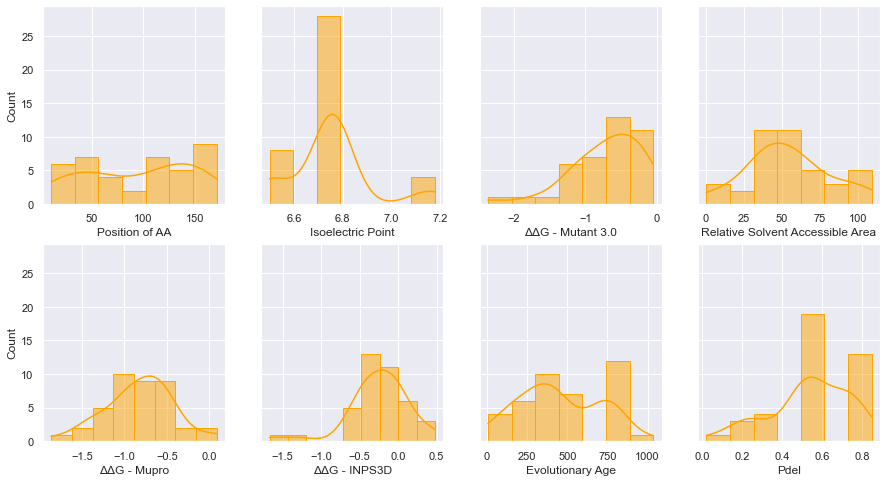

In [12]:
## Here is a quick way to do:
ig, axes = plt.subplots(2, 4, figsize=(15, 8), sharey=True)

arg1 = 'positionAA_num'
_title = "Position of AA"
sns.histplot(ax=axes[0,0], data=df, x=arg1,color="orange",edgecolor="orange", kde=True).set(xlabel=_title)

arg1 = 'iso_point'
_title = "Isoelectric Point"
sns.histplot(ax=axes[0,1], data=df, x=arg1,color="orange",edgecolor="orange", kde=True).set(xlabel=_title)

arg1 = 'deldel_G1'
_title = "ΔΔG - Mutant 3.0"
sns.histplot(ax=axes[0,2], data=df, x=arg1,color="orange",edgecolor="orange", kde=True).set(xlabel=_title)

arg1 = 'solv_area'
_title = "Relative Solvent Accessible Area"
sns.histplot(ax=axes[0,3], data=df, x=arg1,color="orange",edgecolor="orange", kde=True).set(xlabel=_title)

arg1 = 'deldel_G2'
_title = "ΔΔG - Mupro"
sns.histplot(ax=axes[1,0], data=df, x=arg1,color="orange",edgecolor="orange", kde=True).set(xlabel=_title)

arg1 = 'deldel_G3'
_title = "ΔΔG - INPS3D"
sns.histplot(ax=axes[1,1], data=df, x=arg1,color="orange",edgecolor="orange", kde=True).set(xlabel=_title)

arg1 = 'evo_age'
_title = "Evolutionary Age"
sns.histplot(ax=axes[1,2], data=df, x=arg1,color="orange",edgecolor="orange", kde=True).set(xlabel=_title)

arg1 = 'pdel'
_title = "Pdel"
sns.histplot(ax=axes[1,3], data=df, x=arg1,color="orange",edgecolor="orange", kde=True).set(xlabel=_title)


### Caragroical Data:

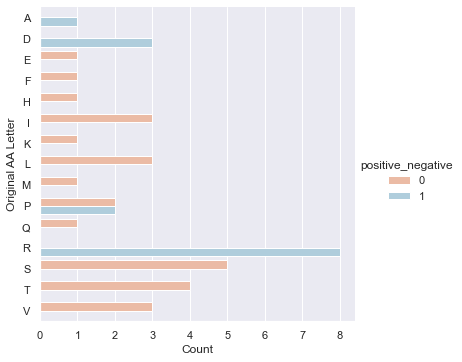

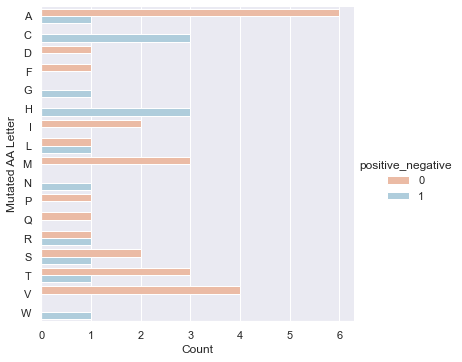

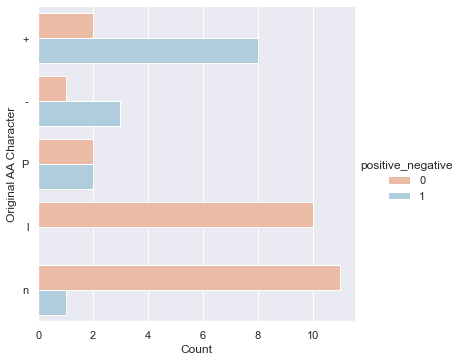

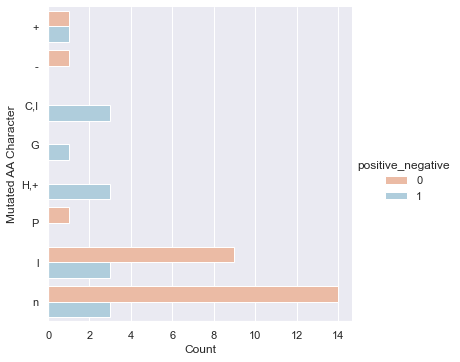

In [13]:
arg1 = "ogAA_letter"
y_axis = "Original AA Letter"
sns.catplot(y=arg1, hue="positive_negative", kind="count", palette="RdBu", data=df.sort_values(by=[arg1])).set(ylabel = y_axis, xlabel = "Count")

arg1 = 'mutAA_letter'
y_axis = "Mutated AA Letter"
sns.catplot(y=arg1, hue="positive_negative", kind="count", palette="RdBu", data=df.sort_values(by=[arg1])).set(ylabel = y_axis, xlabel = "Count")

arg1 = 'ogAA_char'
y_axis = "Original AA Character"
sns.catplot(y=arg1, hue="positive_negative", kind="count", palette="RdBu", data=df.sort_values(by=[arg1])).set(ylabel = y_axis, xlabel = "Count")

arg1 = 'mutAA_char'
y_axis = "Mutated AA Character"
sns.catplot(y=arg1, hue="positive_negative", kind="count", palette="RdBu", data=df.sort_values(by=[arg1])).set(ylabel = y_axis, xlabel = "Count")


### Box Plot Comparisons

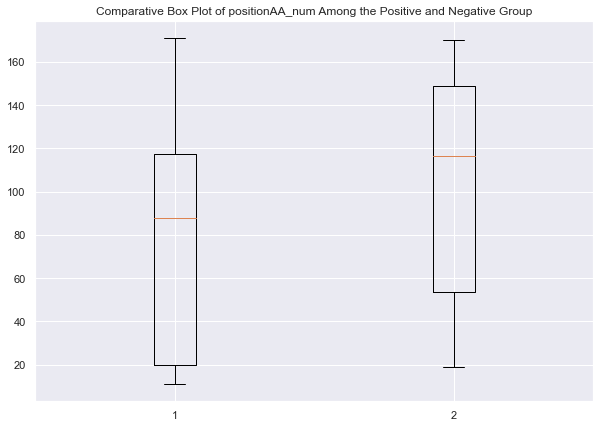

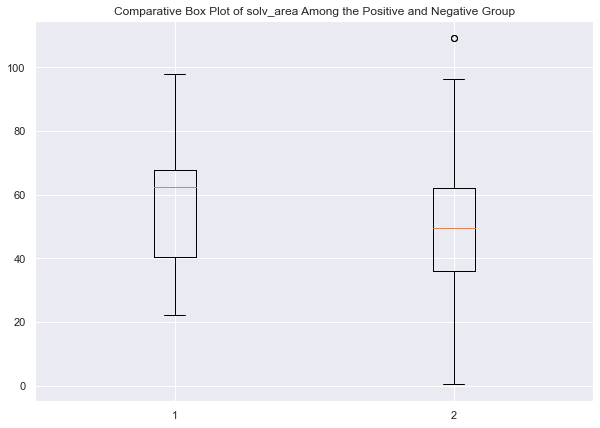

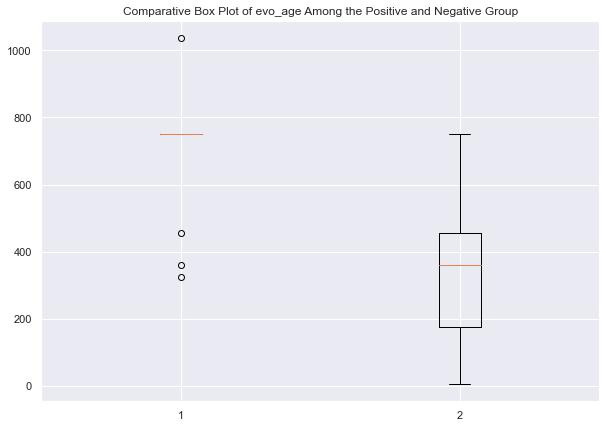

In [14]:
boxWhiskerPosNeg1Var("positionAA_num")
boxWhiskerPosNeg1Var("solv_area")
boxWhiskerPosNeg1Var("evo_age")

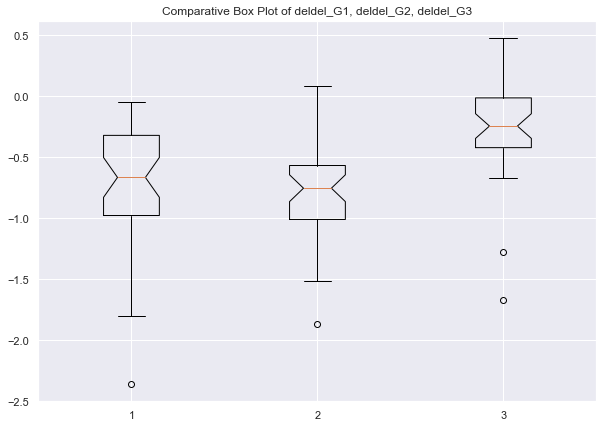

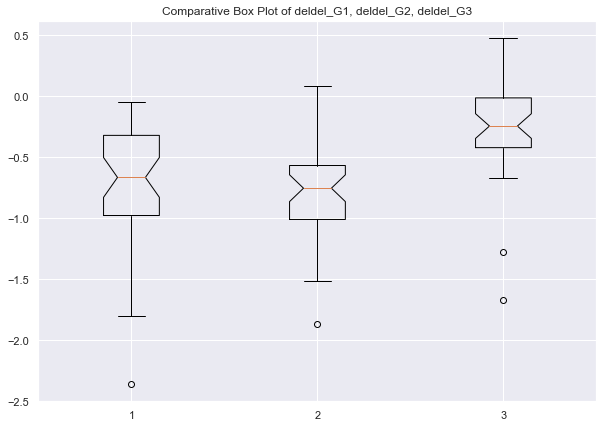

In [15]:
boxWhisker("deldel_G1", "deldel_G2", "deldel_G3")
boxWhisker("deldel_G1", "deldel_G2", "deldel_G3")

## Correlations Between Variables

In [16]:
# find the correlation b/w variables
df.corr()

,positionAA_num,positive_negative,iso_point,deldel_G1,solv_area,deldel_G2,deldel_G3,evo_age,pdel
positionAA_num,1.000000,-0.212026,0.154192,-0.114913,-0.077648,-0.077273,-0.285881,-0.130685,-0.144832
positive_negative,-0.212026,1.000000,-0.073787,0.001806,0.121279,-0.016070,-0.130992,0.695084,0.618828
iso_point,0.154192,-0.073787,1.000000,0.140698,-0.027106,0.002980,0.008971,-0.003443,0.000351
deldel_G1,-0.114913,0.001806,0.140698,1.000000,0.661378,0.354038,0.572535,-0.096884,-0.093740
solv_area,-0.077648,0.121279,-0.027106,0.661378,1.000000,0.213802,0.406019,0.058178,0.186822
deldel_G2,-0.077273,-0.016070,0.002980,0.354038,0.213802,1.000000,0.202339,-0.099622,0.086986
deldel_G3,-0.285881,-0.130992,0.008971,0.572535,0.406019,0.202339,1.000000,-0.265532,-0.121019
evo_age,-0.130685,0.695084,-0.003443,-0.096884,0.058178,-0.099622,-0.265532,1.000000,0.731619
pdel,-0.144832,0.618828,0.000351,-0.093740,0.186822,0.086986,-0.121019,0.731619,1.000000


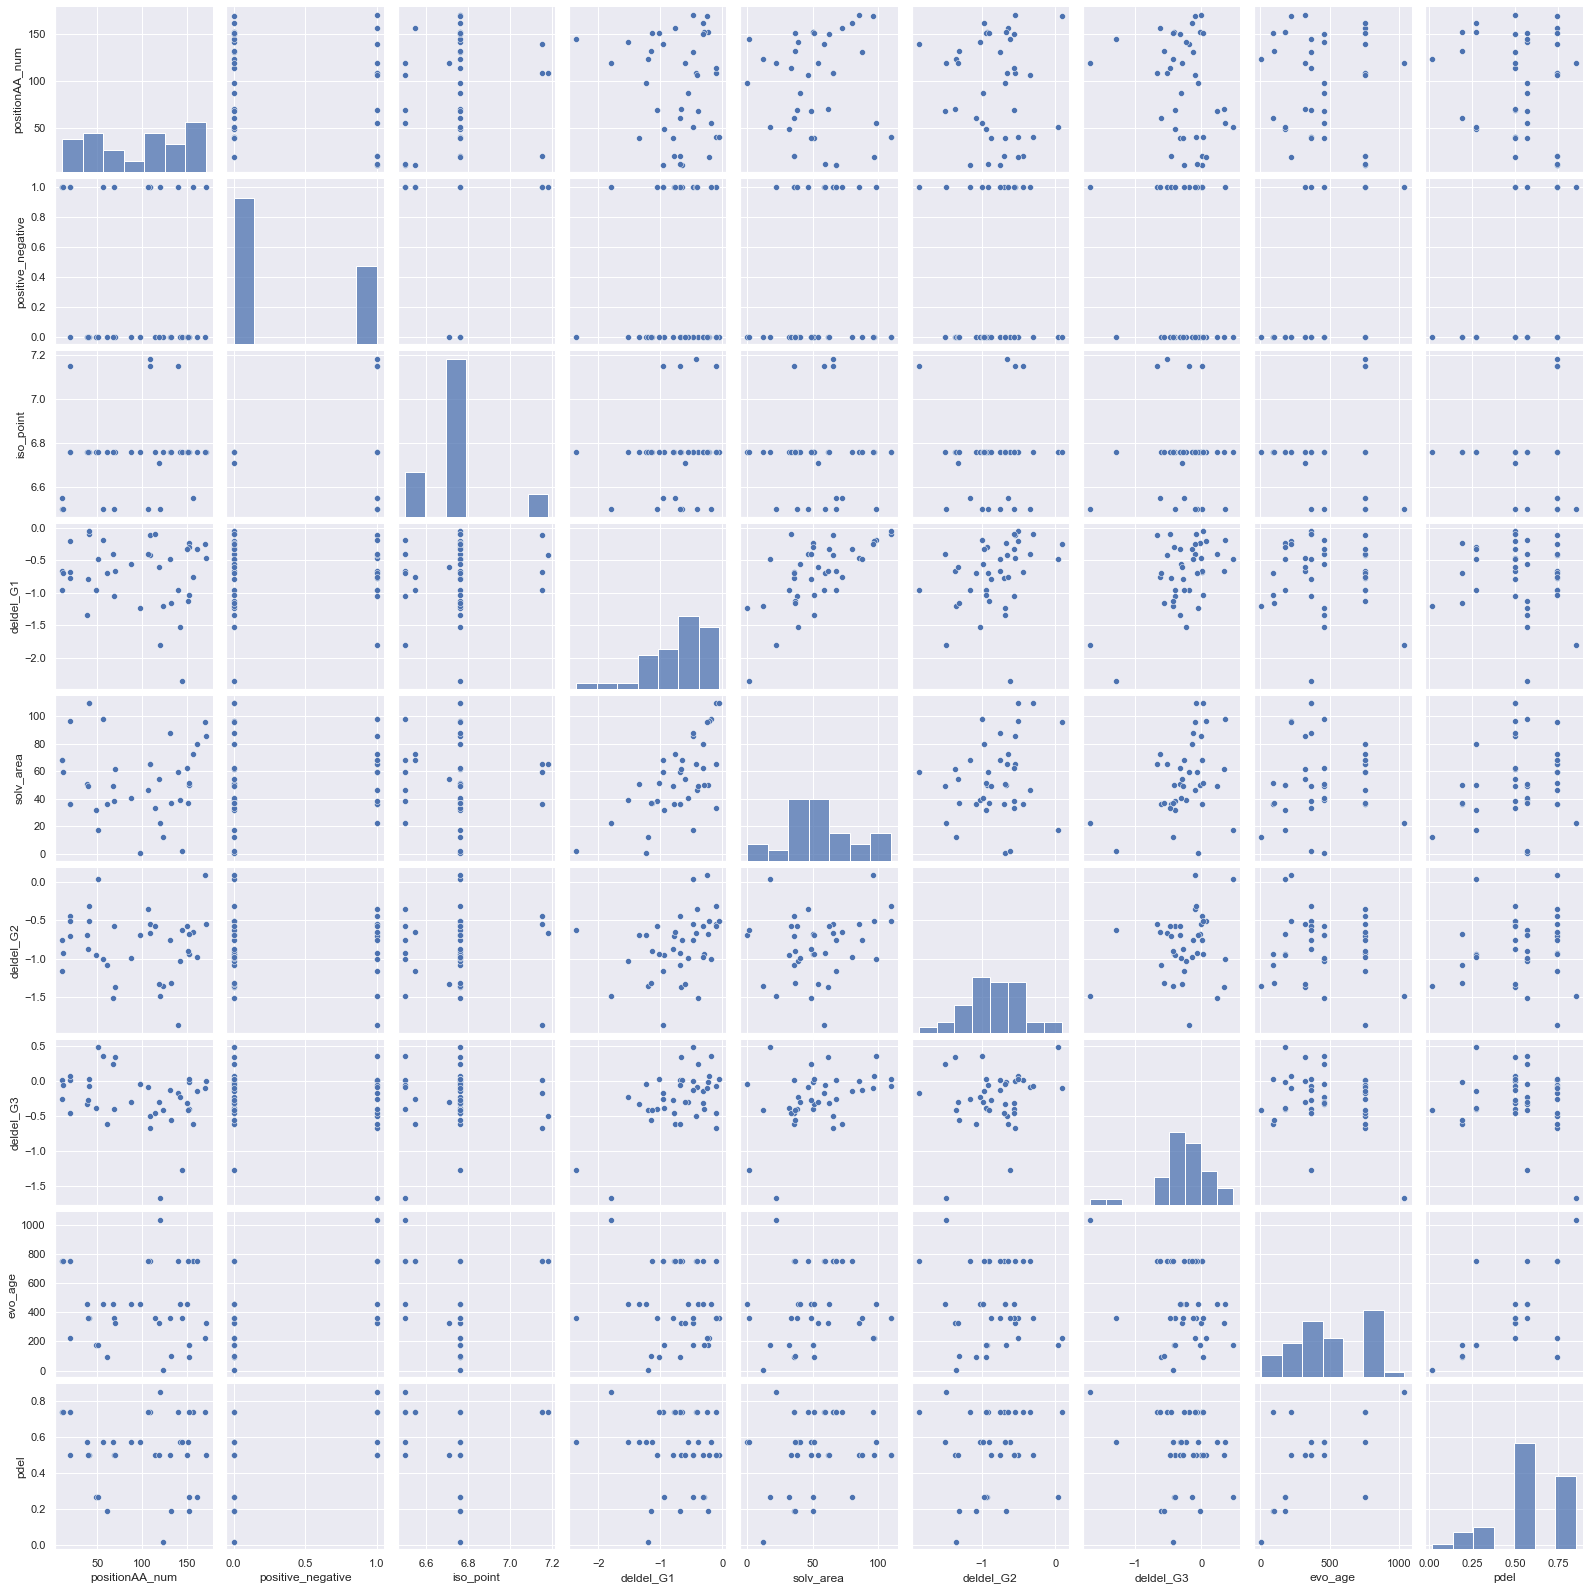

In [17]:
sns.pairplot(data=df)

<AxesSubplot:>

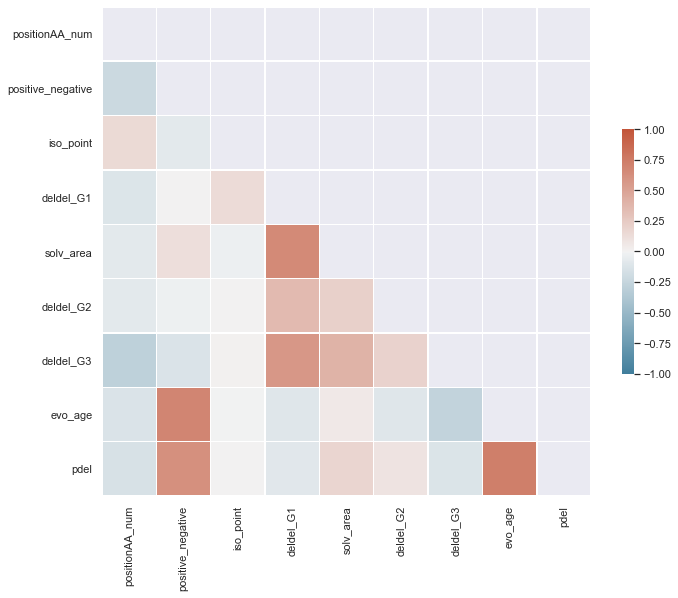

In [18]:
sns.set_theme(style="darkgrid")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = df#pd.DataFrame(data=rs.normal(size=(100, 26)),
     #            columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Comparing Two or More Variables:

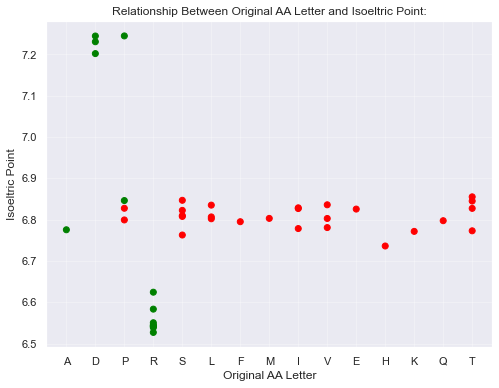

Green = Positive || Red = Negative


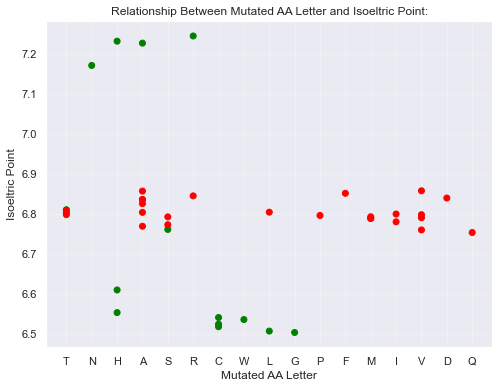

Green = Positive || Red = Negative


In [19]:
scatterplot("Original AA Letter","Isoeltric Point","ogAA_letter","iso_point")
scatterplot("Mutated AA Letter","Isoeltric Point","mutAA_letter","iso_point")

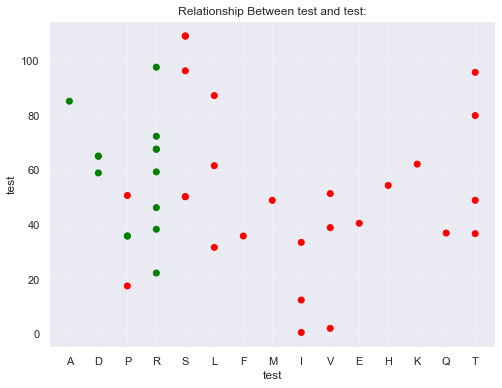

Green = Positive || Red = Negative


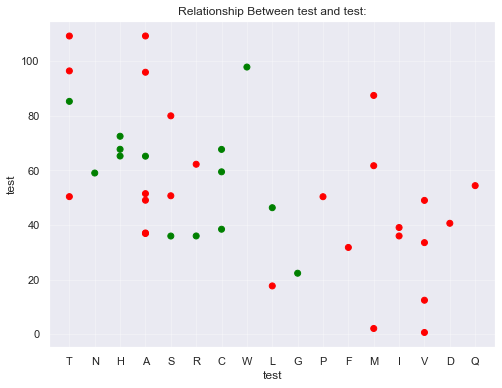

Green = Positive || Red = Negative


In [22]:
scatterplot("test","test","ogAA_letter","solv_area")
scatterplot("test","test","mutAA_letter","solv_area")

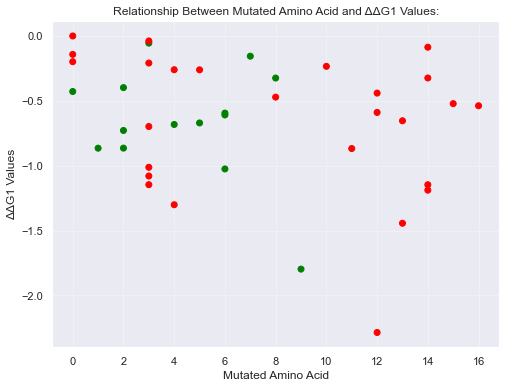

Green = Positive || Red = Negative


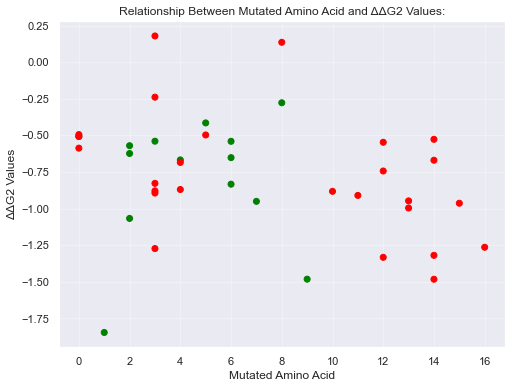

Green = Positive || Red = Negative


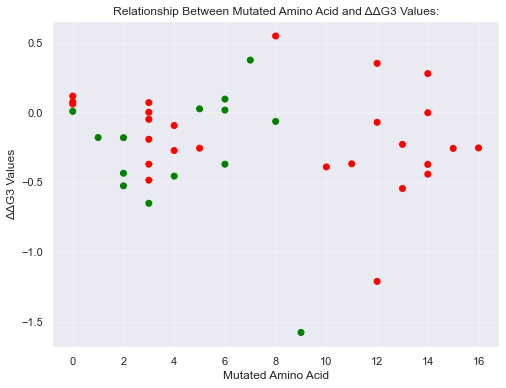

Green = Positive || Red = Negative


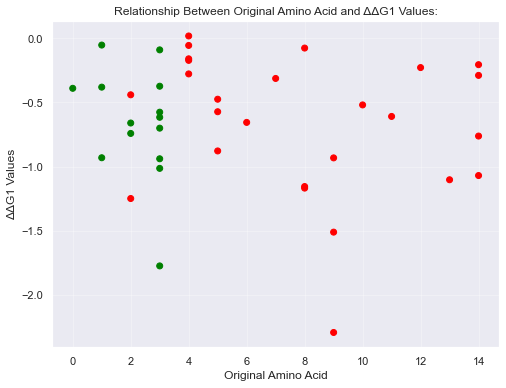

Green = Positive || Red = Negative


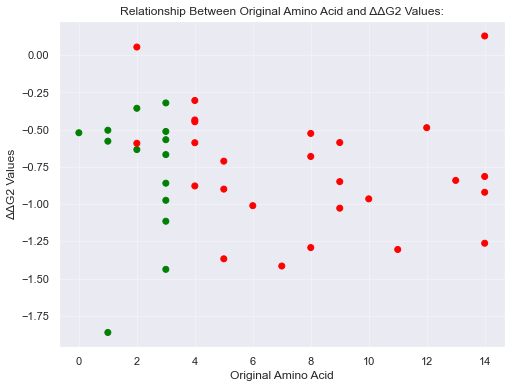

Green = Positive || Red = Negative


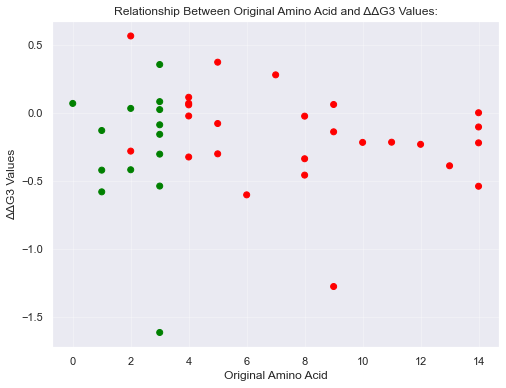

Green = Positive || Red = Negative


In [23]:
df['mutAA_letterCode'] = pd.factorize(df.mutAA_letter)[0]
df['ogAA_letterCode'] = pd.factorize(df.ogAA_letter)[0]
df.head
scatterplot("Mutated Amino Acid","ΔΔG1 Values","mutAA_letterCode","deldel_G1")
scatterplot("Mutated Amino Acid","ΔΔG2 Values","mutAA_letterCode","deldel_G2")
scatterplot("Mutated Amino Acid","ΔΔG3 Values","mutAA_letterCode","deldel_G3")
scatterplot("Original Amino Acid","ΔΔG1 Values","ogAA_letterCode","deldel_G1")
scatterplot("Original Amino Acid","ΔΔG2 Values","ogAA_letterCode","deldel_G2")
scatterplot("Original Amino Acid","ΔΔG3 Values","ogAA_letterCode","deldel_G3")

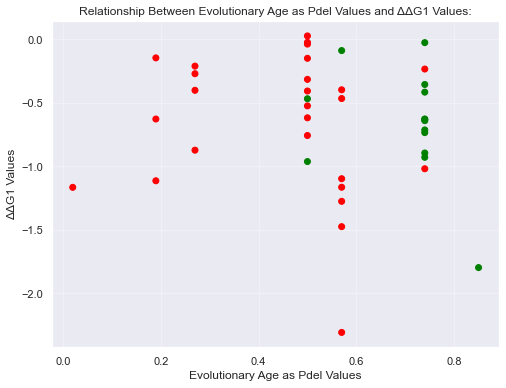

Green = Positive || Red = Negative


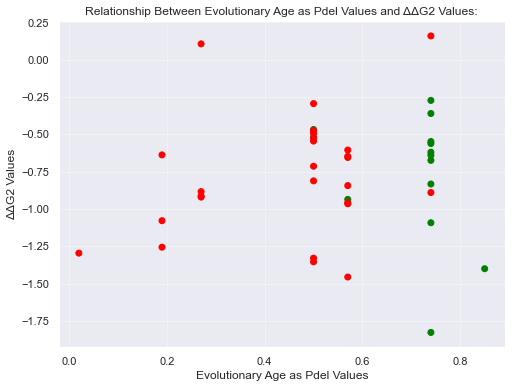

Green = Positive || Red = Negative


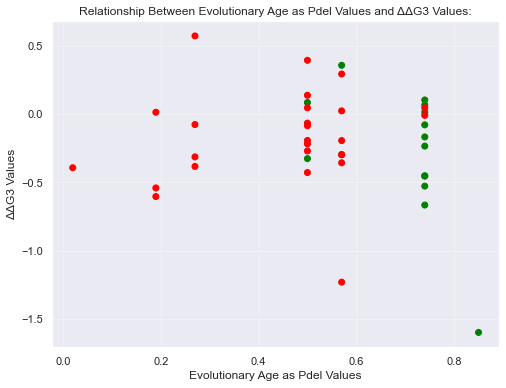

Green = Positive || Red = Negative


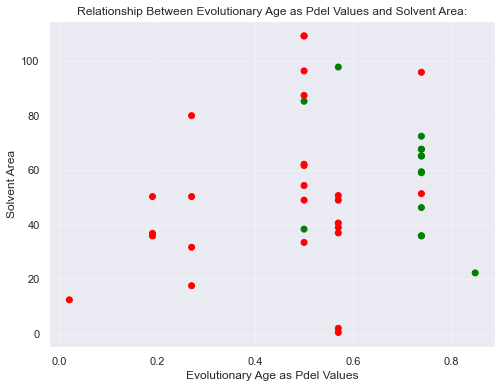

Green = Positive || Red = Negative


In [24]:
scatterplot("Evolutionary Age as Pdel Values", "ΔΔG1 Values", "pdel", "deldel_G1")
scatterplot("Evolutionary Age as Pdel Values", "ΔΔG2 Values", "pdel", "deldel_G2")
scatterplot("Evolutionary Age as Pdel Values", "ΔΔG3 Values", "pdel", "deldel_G3")
scatterplot("Evolutionary Age as Pdel Values", "Solvent Area", "pdel", "solv_area")

In [28]:
scatterplot3D("Evolutionary Age as Pdel Values", "ΔΔG1 Values", "pdel", "deldel_G1")